This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'qtl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Courtney\Documents\R\win-library\3.6\00LOCK\qtl\libs\x64\qtl.dll to C:\Users\Courtney\Documents\R\win-library\3.6\qtl\libs\x64\qtl.dll: Permission denied"
Warning message:
"restored 'qtl'"



The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpqOm8vJ\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtlcharts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpqOm8vJ\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'LinkageMapView' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpqOm8vJ\downloaded_packages


Installing package into 'C:/Users/Courtney/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Courtney\AppData\Local\Temp\RtmpqOm8vJ\downloaded_packages


In [2]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

In [3]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap_Field2020.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  53


 --Read the following data:
	 294  individuals
	 1100  markers
	 54  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


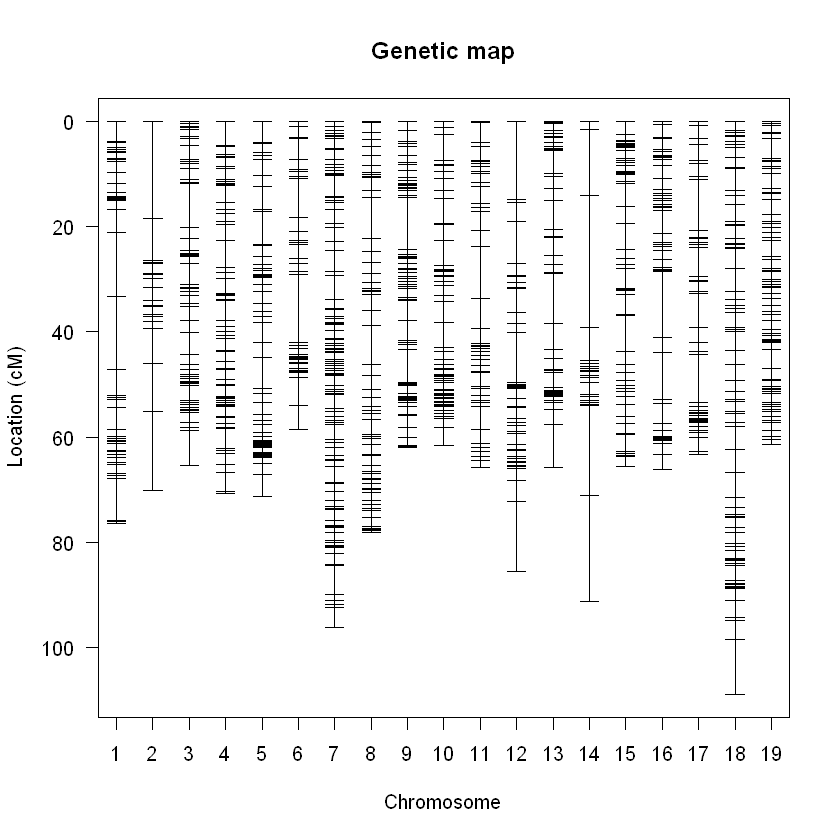

In [4]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

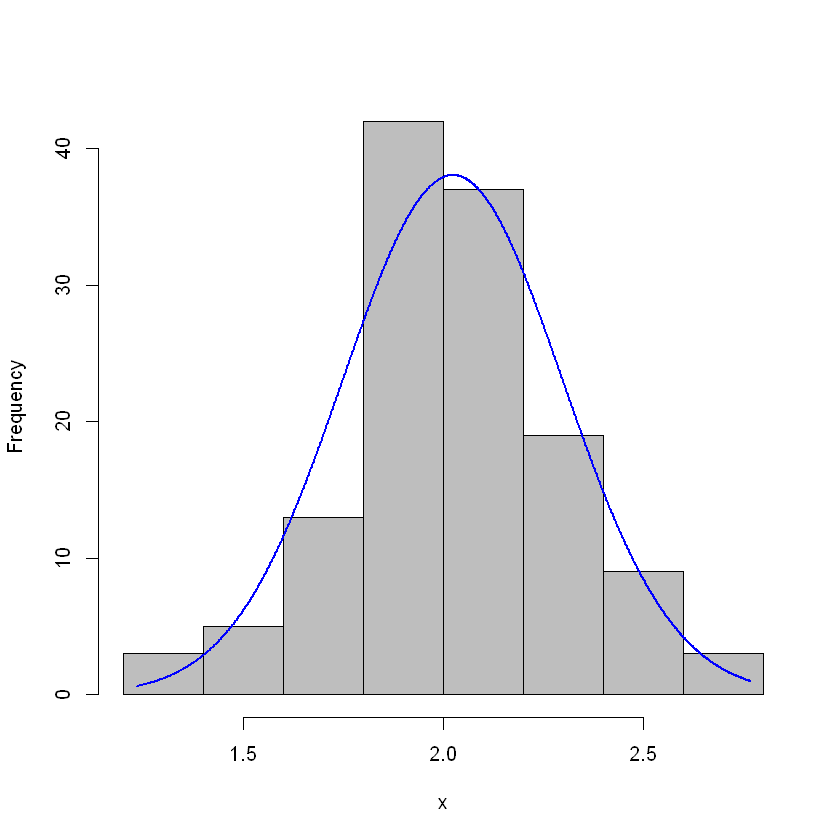

In [5]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

LOD thresholds (1000 permutations)
   [,1]
5% 4.36
1% 5.83

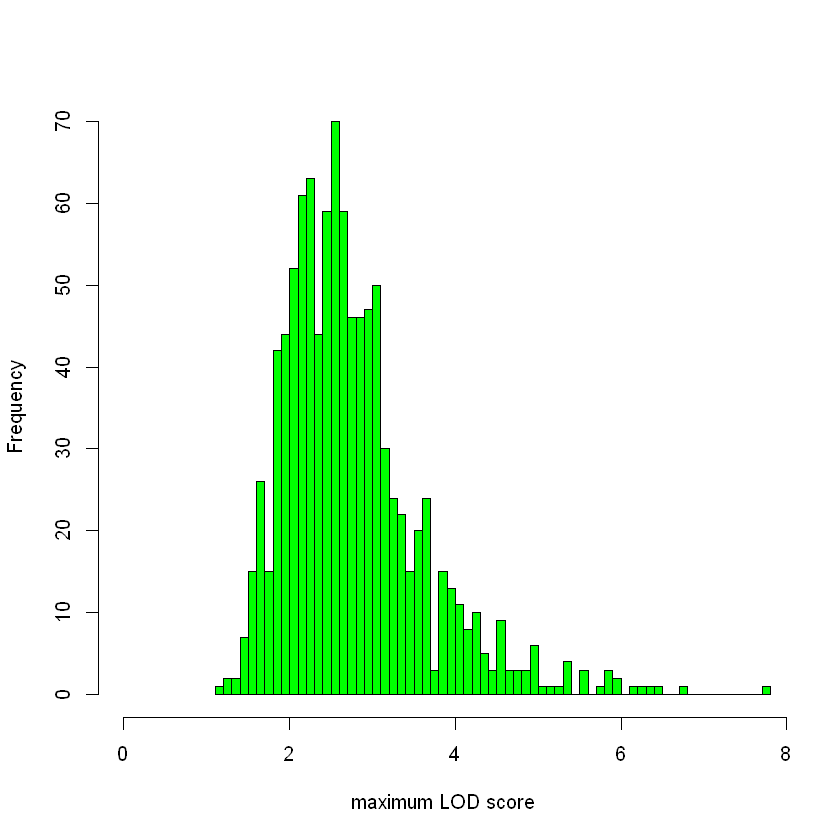

In [6]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc5,1,5.000000,0.5382488
c2.loc31,2,31.000000,2.4337096
3_9044978,3,50.193044,2.4144777
c4.loc50,4,50.000000,2.6055287
c5.loc58,5,58.000000,2.9333897
6_2687012,6,9.130006,1.2801017
7_21352302,7,68.536082,0.6235700
c8.loc58,8,58.000000,0.8459643
c9.loc7,9,7.000000,1.2848991


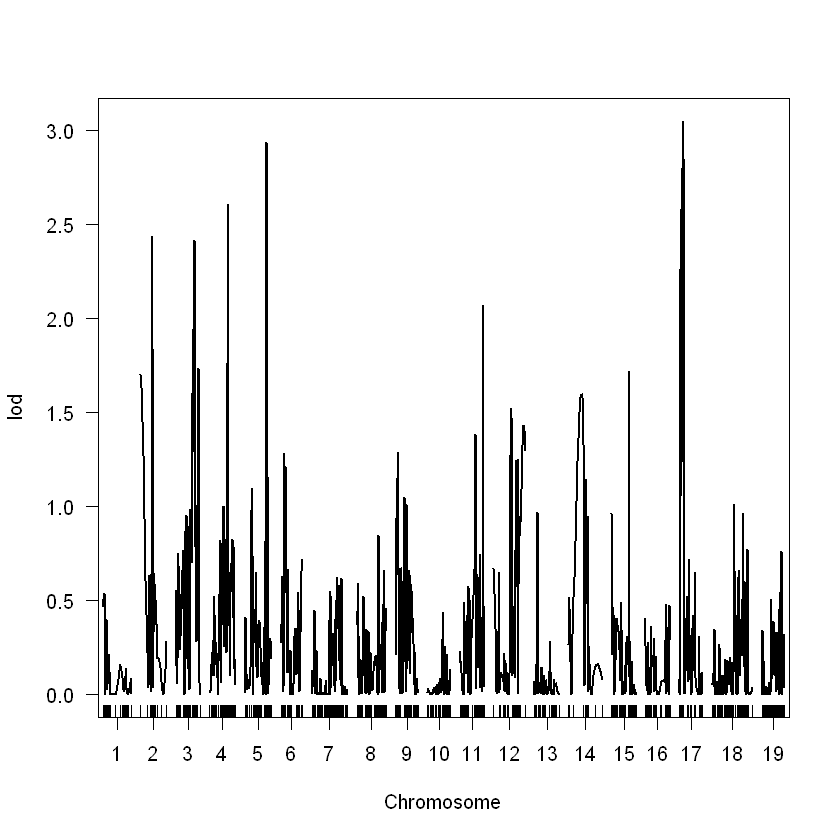

In [7]:
#Deterime LOD Values
LOD5 <- summary(TraitCIM1000,alpha=c(.05))
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
write.csv(TraitCIM,"PHENOTYPE_table.csv")

Chromosome?  17


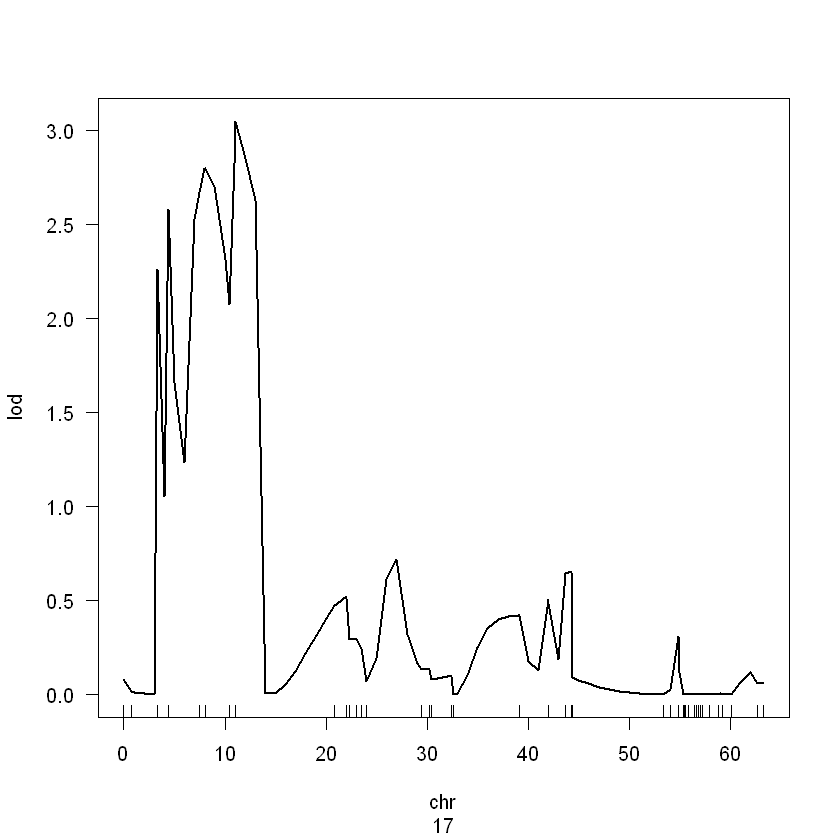

In [8]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [9]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
17_1975198,17,3.267002,2.2613535
17_3326415,17,11.061007,3.0463488
17_4680459,17,20.807008,0.4750199


,chr,pos,lod
,<fct>,<dbl>,<dbl>
17_1438660,17,0.736001,0.01668306
17_3326415,17,11.061007,3.04634879
17_4680459,17,20.807008,0.47501989


In [10]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  11.061007


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 163 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 131 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df        SS        MS      LOD     %var Pvalue(Chi2)   Pvalue(F)
Model   1 0.8834775 0.8834775 2.683646 9.002744 0.0004389483 0.000497968
Error 129 8.9299477 0.0692244                                           
Total 130 9.8134252                                                     


Estimated effects:
-----------------
              est      SE      t
Intercept 2.02323 0.02299 88.009
17@11.1   0.16799 0.04702  3.572


In [11]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap_Field2020.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  53


 --Read the following data:
	 294  individuals
	 1128  markers
	 54  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


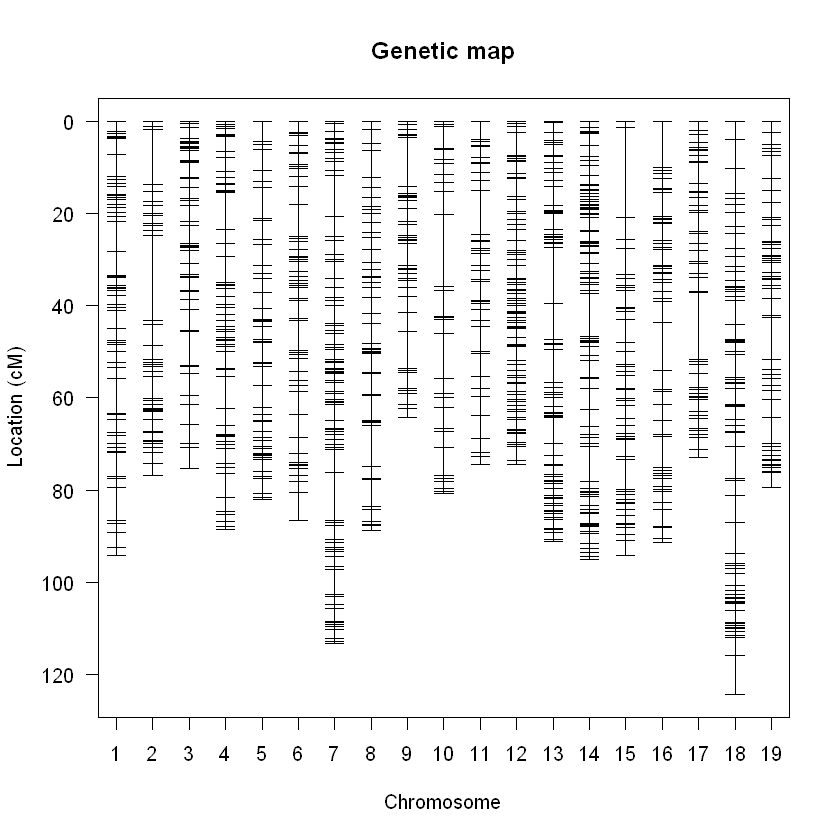

In [12]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

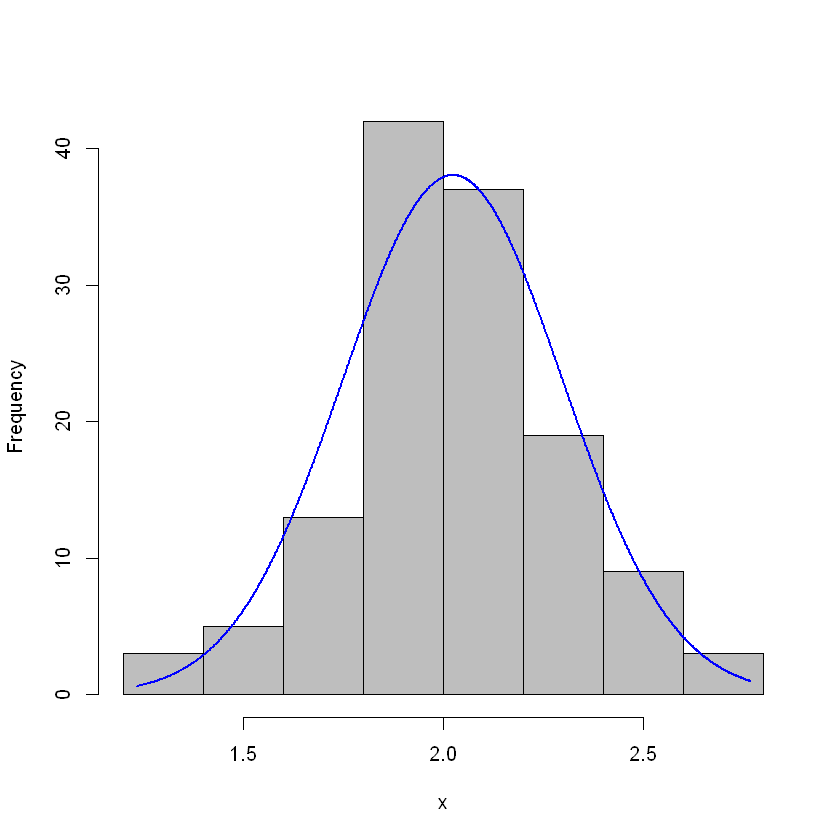

In [13]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

LOD thresholds (1000 permutations)
   [,1]
5%  4.2
1%  5.5

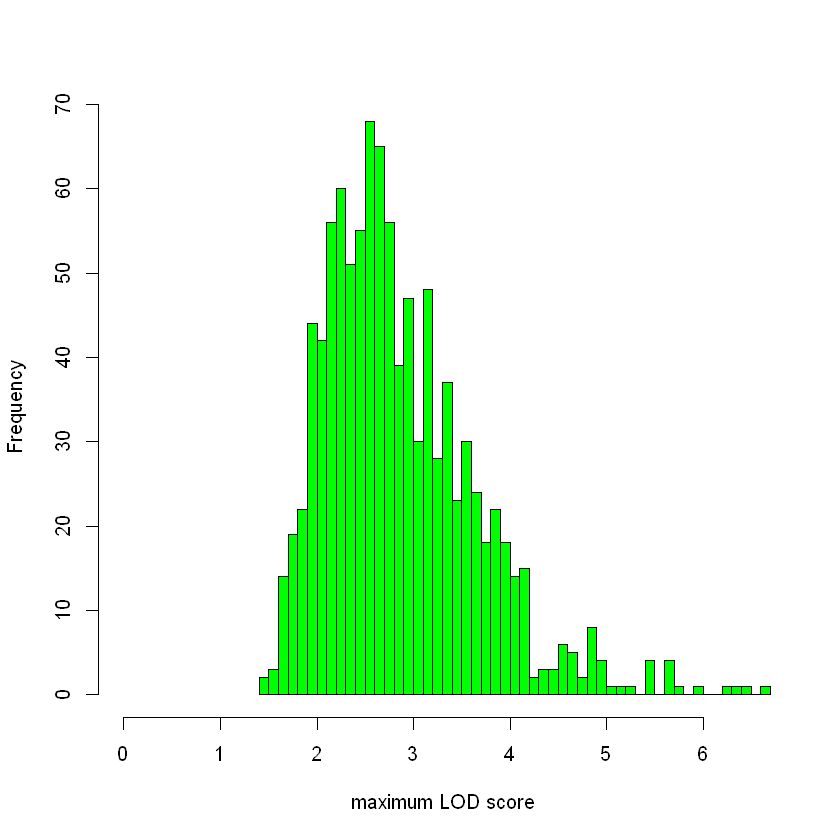

In [19]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
summary(TraitCIM1000,alpha=c(.05,.01))

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc2,1,2.000000,0.8951877
c2.loc46,2,46.000000,1.4010684
c3.loc54,3,54.000000,1.1881389
12_9215138,4,44.595031,1.2393774
5_262303,5,0.000000,1.0535707
6_2018054,6,7.013007,1.1969556
c7.loc60,7,60.000000,1.8307530
c8.loc73,8,73.000000,0.6344829
c9.loc31,9,31.000000,1.1482665


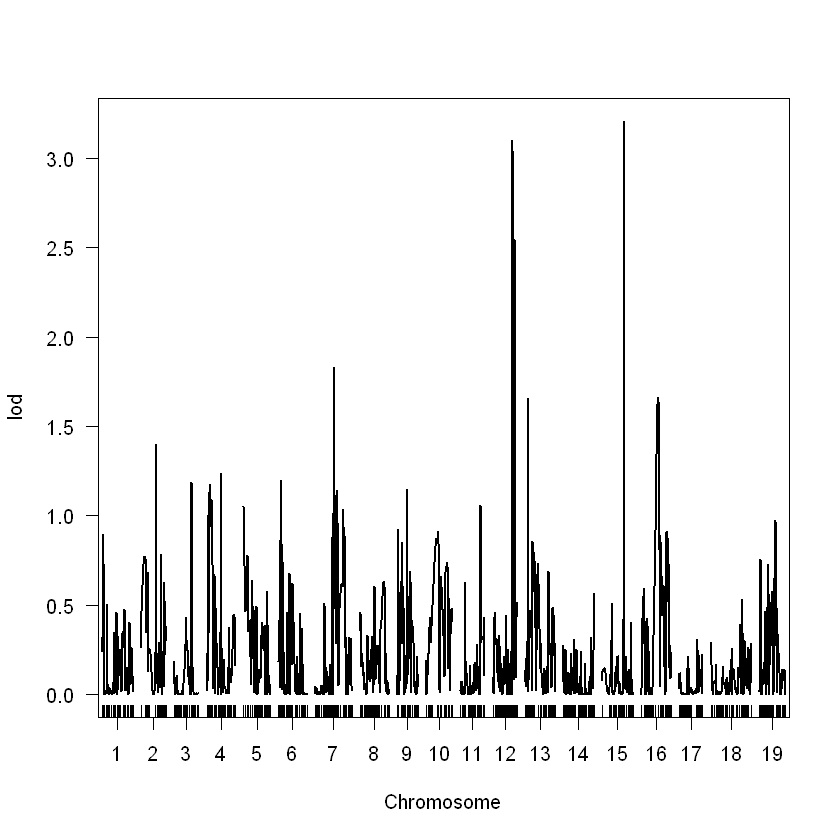

In [20]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)
write.csv(TraitCIM,"DeacclimationRateMaleMap_table.csv")

Chromosome?  15


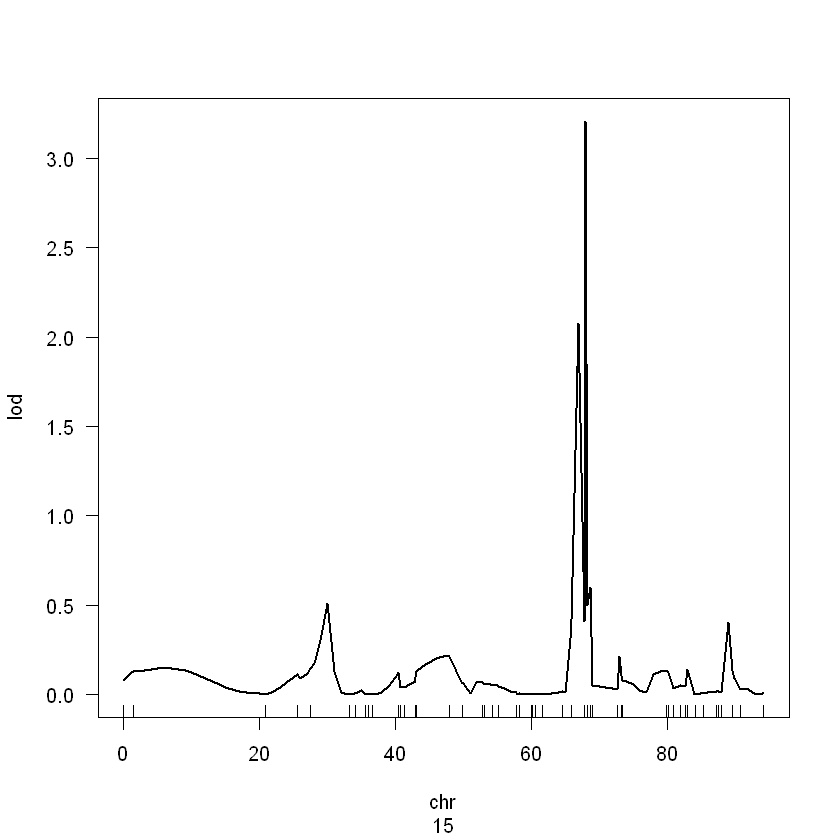

In [21]:
#Chromosomal Analysis
chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
plot(TraitCIM, chr = chr,xlab = c("chr",chr)) #Plot chr LOD scores
abline(h = LOD5, col = "blue") #Statistically Significant

In [22]:
bayesint(TraitCIM, chr = chr, prob=0.95, expandtomarkers=TRUE) #calculate bayesian interval
lodint(TraitCIM, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
2_16557224,15,0.00000,0.078716120
c15.loc68,15,68.00000,3.206839771
15_19559986,15,94.29005,0.009425483


,chr,pos,lod
,<fct>,<dbl>,<dbl>
15_15249593,15,65.89603,0.3732615
c15.loc68,15,68.00000,3.2068398
15_15938964,15,68.34003,0.4981329


In [23]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  68.00000


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 163 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 131 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df       SS         MS      LOD    %var Pvalue(Chi2)    Pvalue(F)
Model   1 1.138926 1.13892619 3.509242 11.6058 5.819025e-05 6.845787e-05
Error 129 8.674499 0.06724418                                           
Total 130 9.813425                                                      


Estimated effects:
-----------------
              est      SE      t
Intercept 2.02692 0.02268 89.358
15@68.0   0.94584 0.22982  4.115


Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 163 individuals with missing phenotypes.
"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c15.loc68,15,68,4.402402


15_15640823,pheno,inferred
<ord>,<dbl>,<dbl>
1,2.263685,0
1,2.164150,0
2,NA,0
2,2.414990,0
1,2.028889,0
2,NA,0


 15_15640823     pheno          inferred
 1:143       Min.   :1.230   Min.   :0  
 2:151       1st Qu.:1.855   1st Qu.:0  
             Median :2.026   Median :0  
             Mean   :2.022   Mean   :0  
             3rd Qu.:2.186   3rd Qu.:0  
             Max.   :2.767   Max.   :0  
             NA's   :163                

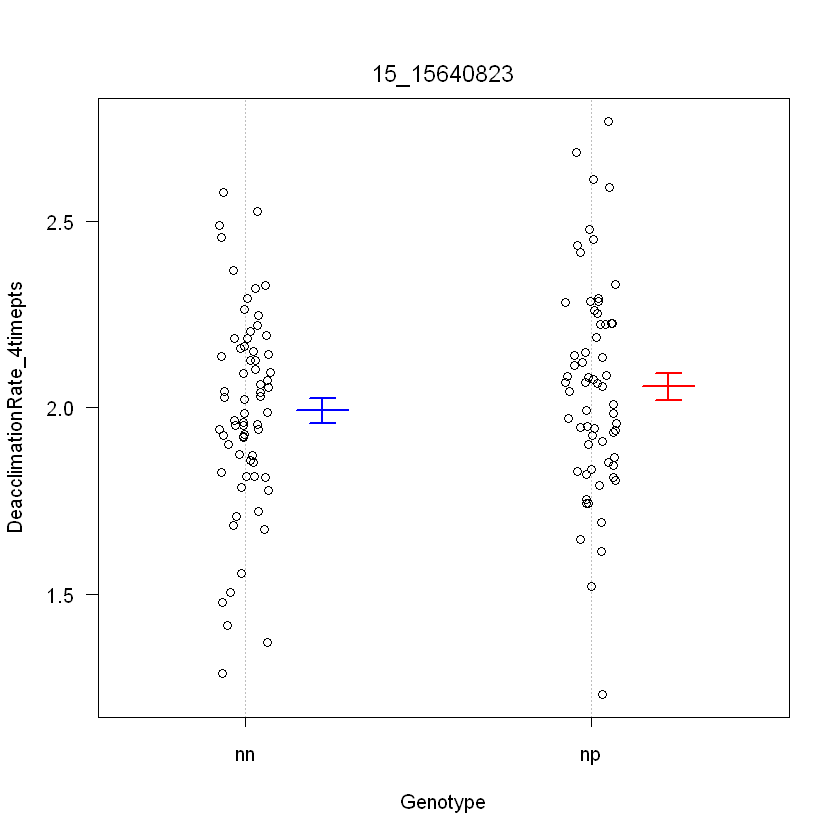

In [24]:
out.hk <- scanone(Map, pheno.col=52, method="hk")
max(out.hk)
Map <- sim.geno(Map, n.draws=1, step=1)
mar <- find.marker(Map, chr=15, pos=68.0)
output <- plotPXG(Map, pheno.col=53, marker = mar)
head(output)
summary(output)

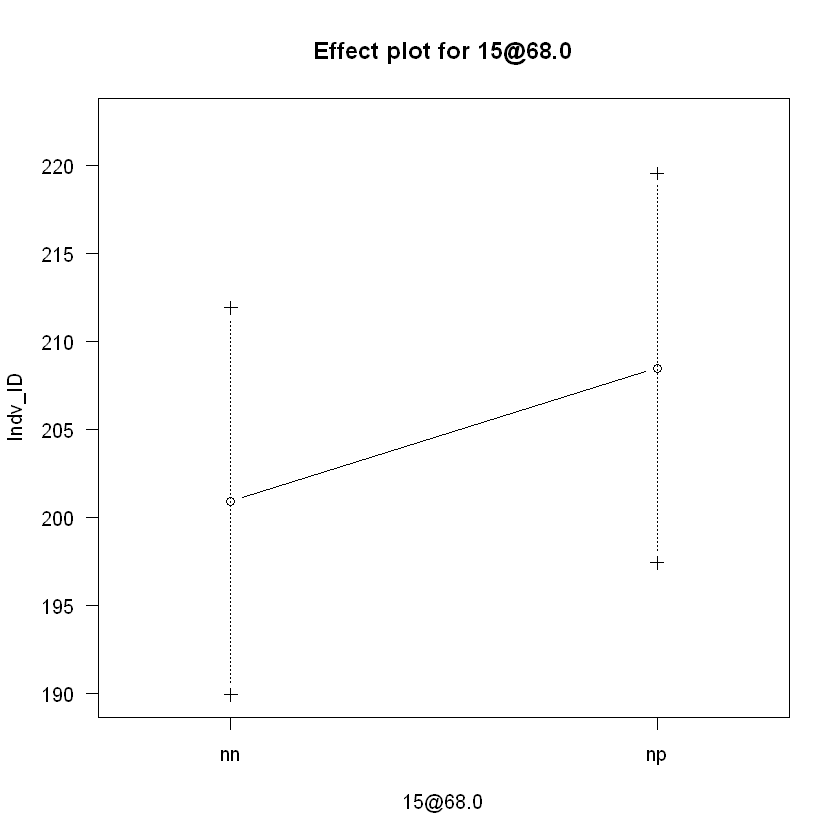

In [25]:
effectplot(Map, mname1="15@68")